In [1]:
!git clone https://github.com/mybothy/bangkit-machine-learning.git

Cloning into 'bangkit-machine-learning'...
remote: Enumerating objects: 3102, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 3102 (delta 18), reused 36 (delta 9), pack-reused 3052 (from 1)
Receiving objects: 100% (3102/3102), 268.83 MiB | 25.97 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Updating files: 100% (5453/5453), done.


In [2]:
model_path = "bangkit-machine-learning/FINALBGSBGT/my_model_lite.tflite"

Predicted Class: Omelette
Confidence Score: 1.00


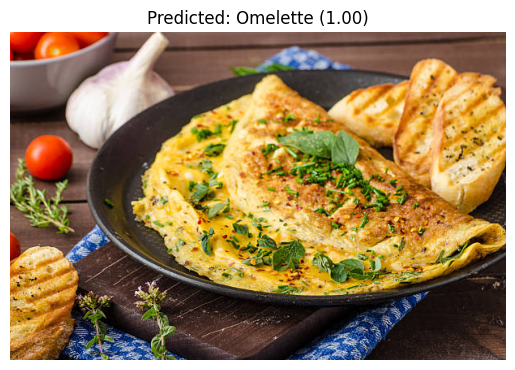

In [3]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Define class names
class_names = ["French Fries", "Omelette", "Steak"]

# Load the TFLite model
def load_tflite_model(model_path):
    with open(model_path, "rb") as f:
        tflite_model = f.read()
    interpreter = tf.lite.Interpreter(model_content=tflite_model)
    interpreter.allocate_tensors()
    return interpreter

# Preprocess the input image
def preprocess_image(image_path, target_size=(224, 224)):
    # Load image
    image = Image.open(image_path).convert("RGB")
    # Resize image
    image = image.resize(target_size)
    # Normalize pixel values to [0, 1]
    # image_array = np.array(image) / 255.0
    image_array = np.array(image)
    # Convert to float32
    image_array = image_array.astype(np.float32)
    # Add batch dimension
    image_array = np.expand_dims(image_array, axis=0)
    return image_array


# Make prediction
def predict_food_image(interpreter, image_array):
    # Get input and output details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], image_array)

    # Run the inference
    interpreter.invoke()

    # Get the output tensor
    predictions = interpreter.get_tensor(output_details[0]['index'])
    return predictions

# Path to your TFLite model
tflite_model_path = model_path

# Load the model
interpreter = load_tflite_model(tflite_model_path)

# Path to the image you want to predict
image_path = "bangkit-machine-learning/tes/omelette/istockphoto-485040276-612x612.jpg"  # Replace with the path to your food image

# Preprocess the image
image_array = preprocess_image(image_path)

# Predict
predictions = predict_food_image(interpreter, image_array)

# Display results
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]
confidence_score = np.max(predictions)

print(f"Predicted Class: {predicted_class_name}")
print(f"Confidence Score: {confidence_score:.2f}")

# Show the input image
plt.imshow(Image.open(image_path))
plt.title(f"Predicted: {predicted_class_name} ({confidence_score:.2f})")
plt.axis("off")
plt.show()


In [4]:
!pip install tflite-support

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.


In [1]:
# Define class names
class_names = ["French Fries", "Omelette", "Steak"]

# Path to save the labels file
labels_file_path = "bangkit-machine-learning/FINALBGSBGT/labels.txt"

# Write class names to the file
with open(labels_file_path, "w") as f:
    for class_name in class_names:
        f.write(f"{class_name}\n")

print(f"Labels file created at: {labels_file_path}")


Labels file created at: bangkit-machine-learning/FINALBGSBGT/labels.txt


In [3]:
!pip install tensorflow
!pip install tflite-support==0.4.1

ERROR: Could not find a version that satisfies the requirement tflite-support==0.4.1 (from versions: 0.1.0a0.dev3, 0.1.0a0.dev4, 0.1.0a0.dev5, 0.1.0a0, 0.1.0a1, 0.4.4)
ERROR: No matching distribution found for tflite-support==0.4.1


In [4]:
# Import necessary libraries
from tflite_support.metadata_writers import writer_utils
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import metadata_info

# Path to the TFLite model
model_path = "bangkit-machine-learning/FINALBGSBGT/my_model_lite.tflite"
# Path to save the model with metadata
model_with_metadata_path = "my_model_lite_with_metadata.tflite"
# Path to label file
label_file = "bangkit-machine-learning/FINALBGSBGT/labels.txt"  # Create a file with each class name on a new line

# Create the metadata writer for an image classifier
writer = image_classifier.MetadataWriter.create_for_inference(
    writer_utils.load_file(model_path),
    input_norm_mean=[0.0],  # No normalization applied
    input_norm_std=[1.0],   # Raw pixel values passed directly
    label_file_paths=[label_file]
)

# Populate metadata into the model
writer_utils.save_file(writer.populate(), model_with_metadata_path)
print("Metadata successfully added!")

Metadata successfully added!


In [11]:
import tensorflow as tf
from PIL import Image
import numpy as np

# Load the TFLite model
def load_tflite_model(model_path):
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()
    return interpreter

# Load labels from a labels.txt file
def load_labels(labels_file_path):
    with open(labels_file_path, "r") as f:
        labels = [line.strip() for line in f.readlines()]
    return labels

# Preprocess the input image
def preprocess_image(image_path, target_size=(224, 224)):
    image = Image.open(image_path).convert("RGB").resize(target_size)
    image_array = np.array(image, dtype=np.float32)
    return np.expand_dims(image_array, axis=0)

# Predict the image
def predict_image(interpreter, image_array):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    interpreter.set_tensor(input_details[0]['index'], image_array)
    interpreter.invoke()

    predictions = interpreter.get_tensor(output_details[0]['index'])
    return predictions

# Paths to model and labels
model_path = "my_model_lite_with_metadata.tflite"  # Path to your TFLite model
labels_path = "bangkit-machine-learning/FINALBGSBGT/labels.txt"                         # Path to your labels.txt file
image_path = "bangkit-machine-learning/tes/omelette/pexels-catscoming-705127.jpg"         # Path to the image to predict

# Load labels
labels = load_labels(labels_path)

# Run inference
interpreter = load_tflite_model(model_path)
image_array = preprocess_image(image_path)
predictions = predict_image(interpreter, image_array)

# Display results
predicted_class_index = np.argmax(predictions)
predicted_class_name = labels[predicted_class_index]
confidence_score = np.max(predictions)

print(f"Predicted Food: {predicted_class_name}")
print(f"Confidence Score: {confidence_score:.2f}")


Predicted Food: Omelette
Confidence Score: 0.98
